<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/PySaprk_Testing_%26_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Spark + import lib + start spark session



In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [606 kB]
Hit:12 http://ppa.launchpad.net

In [2]:
#Get Install the Java Development Kit
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Get Spark lib -- address need to be change according to the current version of Spark: https://downloads.apache.org/spark/
!wget -q http://apache.osuosl.org/spark/spark-3.0.3/spark-3.0.3-bin-hadoop3.2.tgz
#Unzip th Spark
!tar xf spark-3.0.3-bin-hadoop3.2.tgz
#install findspark for Python
!pip install -q findspark
#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop3.2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

     |████████████████████████████████| 57 kB 3.0 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
3.0.3


In [3]:
pip install pyspark_dist_explore

In [4]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, display_html #usefull to display wide tables
from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
from pyspark.sql import Row

from pyspark.sql.functions import lit
from pyspark import SparkConf
from pyspark import SparkContext
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

#sc = pyspark.SparkContext()
sqlContext = pyspark.SQLContext(sc)
%matplotlib inline

##Getting sample data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#Adding API code here
!kaggle datasets download -d claudiodavi/superhero-set

!unzip /content/superhero-set.zip  && rm /content/superhero-set.zip

In [ ]:
file_path = "./heroes_information.csv"
df_hero_indi = spark.read.options(header="true",inferschema = "true").csv(file_path)

file_path = "./super_hero_powers.csv"
df_hero_power = spark.read.options(header="true",inferschema = "true").csv(file_path)

df_hero_indi.show()
df_hero_power.show()

##Create sample data

In [1]:
# Create some data in a Spark DataFrame:
n_observations = 200

random_dist_1 = np.random.logistic(100, 1000, n_observations)
random_dist_2 = np.random.logistic(400, 500, n_observations)
age_dist_1 = 20 * np.random.randn(n_observations) + 40
age_dist_2 = 15 * np.random.randn(n_observations) + 30

list_male = [('M', rand_value, age_dist_1[i]) for i, rand_value in enumerate(random_dist_1)]
list_female = [('F', rand_value, age_dist_2[i]) for i, rand_value in enumerate(random_dist_2)]

list_male_female = list_male + list_female

rdd = sc.parallelize(list_male_female)
transactions = rdd.map(lambda x: Row(gender=x[0], amount=float(x[1]), age=float(x[2])))
transactions_df = sqlContext.createDataFrame(transactions)

NameError: ignored

In [9]:
transactions_df.show()

+------+-------------------+------------------+
|gender|             amount|               age|
+------+-------------------+------------------+
|     M|-307.35163733949696| 23.13978749009966|
|     M|-252.12324408958648| 55.71061098961813|
|     M| -1870.034878068094| 66.66474376080228|
|     M|-153.59120760591674| 69.86440318100797|
|     M|  803.3039131765544|39.586140970899535|
|     M| -909.4906468109273|46.767532630144444|
|     M| 2053.3636929430486|10.329857738480577|
|     M|  967.7884804843553| 40.08117290400971|
|     M|-2120.4813918618884| 33.73928085307104|
|     M| -916.2911512870834|23.734754446703224|
|     M| 343.18260451044046|   24.664283935085|
|     M|-3637.5992379099616|35.699166603300476|
|     M| -338.5487647571322| 28.97335654102094|
|     M| -372.9228616846234| 65.96222789768711|
|     M| 1502.9108639666101|62.373259283044874|
|     M| -3009.337547731182|19.034447120177074|
|     M|-1531.2892716924105|21.016460260200517|
|     M| 2002.2742596294454|19.803880851

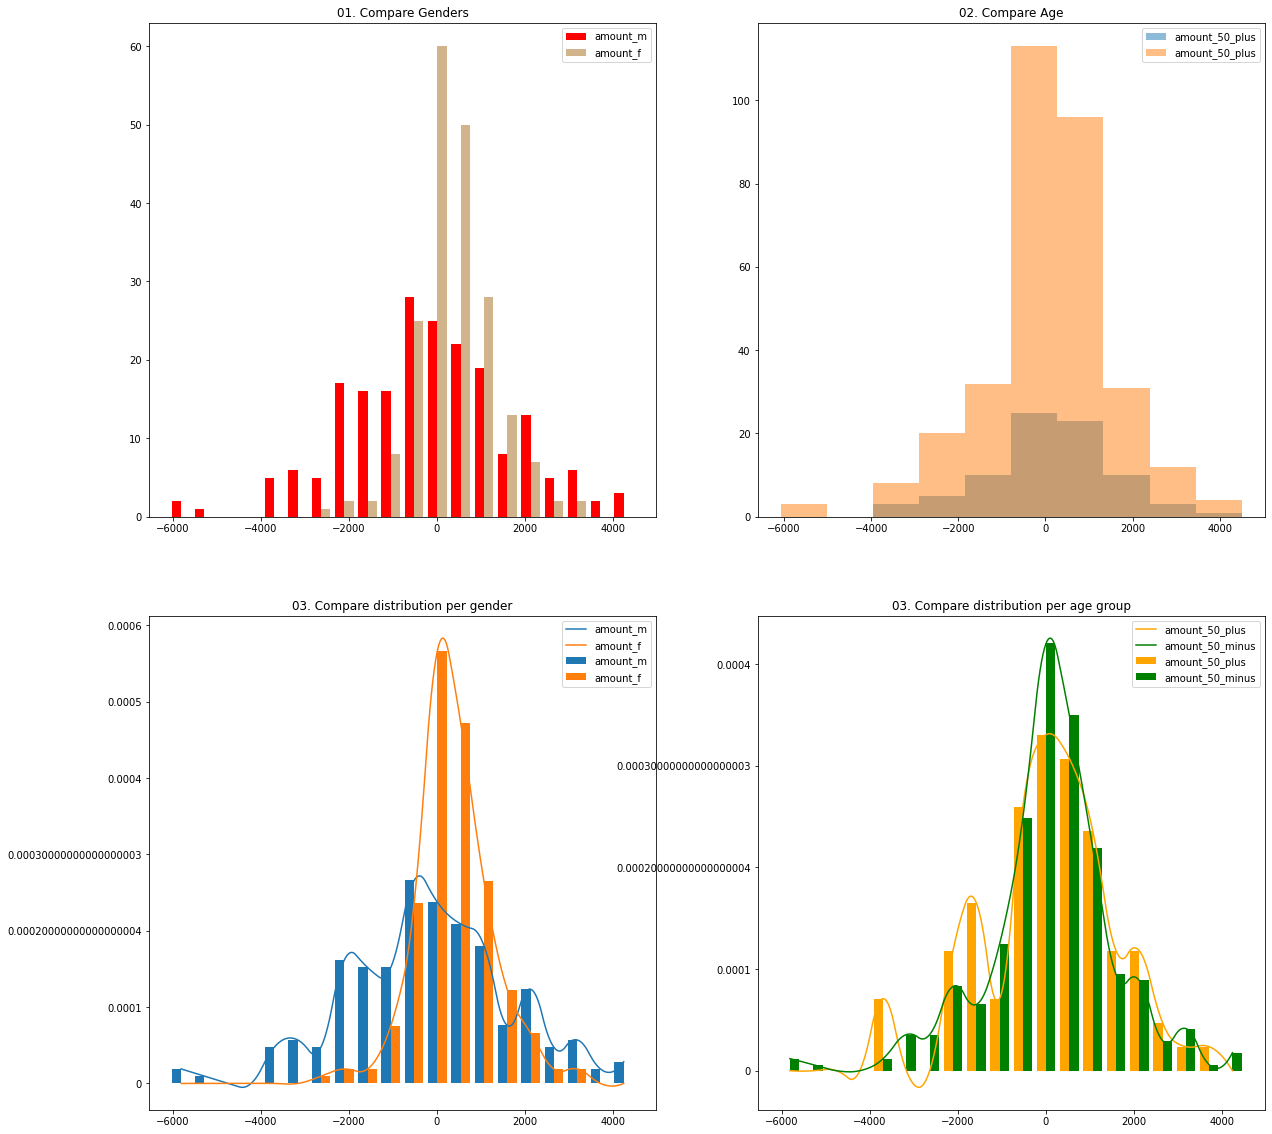

In [10]:
# Create some selections on this data

filtered_by_gender_m = transactions_df.filter(F.col('gender') == 'M').select(F.col('amount').alias('amount_m'))
filtered_by_gender_f = transactions_df.filter(F.col('gender') == 'F').select(F.col('amount').alias('amount_f') )                                                                            
filtered_by_age_50_plus = transactions_df.filter(F.col('age') > 50).select(F.col('amount').alias('amount_50_plus'))
filtered_by_age_50_minus = transactions_df.filter(F.col('age') <= 50).select(F.col('amount').alias('amount_50_minus'))                                                                             
                                                                             
# Create the plots
    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 20)

# Use the hist function to plot histograms on the Axes
hist(axes[0, 0], [filtered_by_gender_m, filtered_by_gender_f], bins = 20, color=['red', 'tan'])
axes[0, 0].set_title('01. Compare Genders')
axes[0, 0].legend()

hist(axes[0, 1], [filtered_by_age_50_plus, filtered_by_age_50_minus], overlapping=True)
axes[0, 1].set_title('02. Compare Age')
axes[0, 1].legend()

# Use the distplot function to plot (scaled) histograms + density plots on the Axes
distplot(axes[1, 0], [filtered_by_gender_m, filtered_by_gender_f], bins=20)
axes[1, 0].set_title('03. Compare distribution per gender')
axes[1, 0].legend()

distplot(axes[1, 1], [filtered_by_age_50_plus, filtered_by_age_50_minus], bins=20, color=['orange', 'green'])
axes[1, 1].set_title('03. Compare distribution per age group')
_ = axes[1, 1].legend()

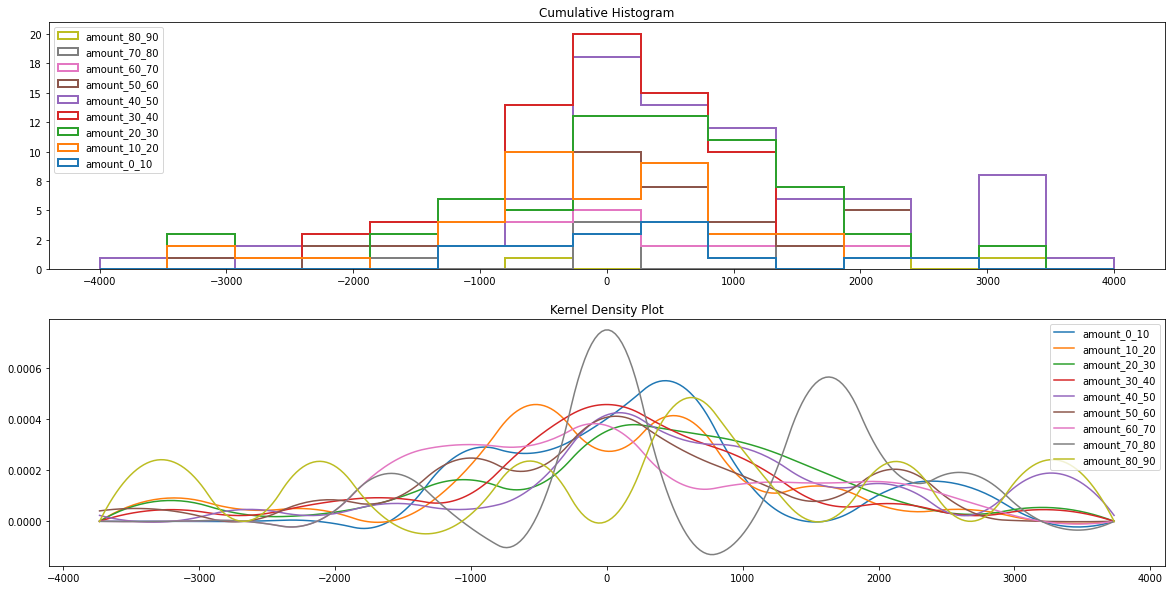

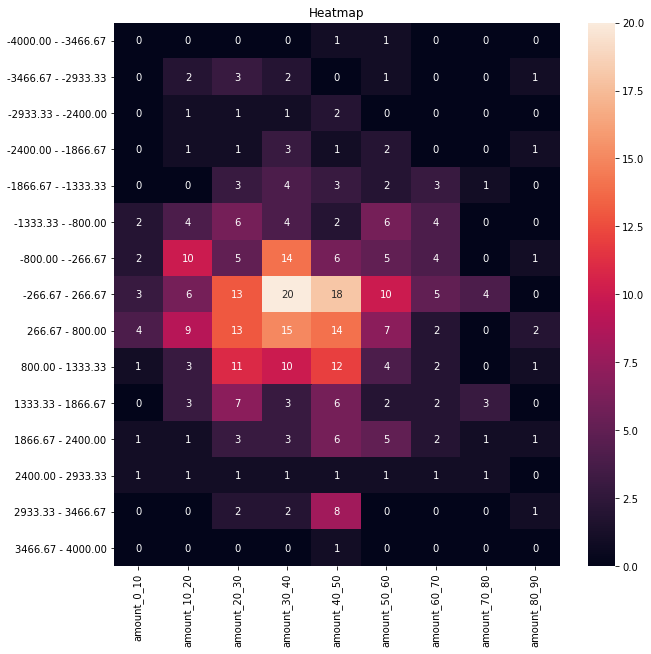

In [ ]:
age_hist = Histogram(range=(-4000, 4000), bins=15)

# Create a histogram for different age groups
for age in range(0, 90, 10):
    age_hist.add_data(
        transactions_df.
        filter((F.col('age') > age) & (F.col('age') <= age+10)).
        select(F.col('amount').alias('amount_%d_%d' % (age, age+10)))
    )

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20, 10)    

age_hist.plot_hist(axes[0], histtype='step', linewidth=2.0, fill=False, cumulative=False) # The Histogram is build here
age_hist.plot_density(axes[1]) # The density plot is created from the already build histogram

# Set the legends
axes[0].legend(loc = 'upper left' )
axes[0].set_title('Cumulative Histogram')
axes[1].legend()
axes[1].set_title('Kernel Density Plot')

age_hist_pd_df = age_hist.to_pandas() # Again the histograms don't need to be recalculated. 

# Create a heatmap from the Pandas Dataframe

fig, axes = plt.subplots()
fig.set_size_inches(10, 10)    
ax = sns.heatmap(age_hist_pd_df, annot=True, ax=axes)
_ = ax.set_title('Heatmap')

In [ ]:
var = 'Weight'
x = data1[var]
bins = np.arange(0, 100, 5.0)

plt.figure(figsize=(10,8))
# the histogram of the data
plt.hist(x, bins, alpha=0.8, histtype='bar', color='gold',
         ec='black',weights=np.zeros_like(x) + 100. / x.size)

plt.xlabel(var)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()

fig.savefig(var+".pdf", bbox_inches='tight')

NameError: ignored

#Testing

#Correlation

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation

data = [(Vectors.sparse(4, [(0, 1.0), (3, -2.0)]),),
        (Vectors.dense([4.0, 5.0, 0.0, 3.0]),),
        (Vectors.dense([6.0, 7.0, 0.0, 8.0]),),
        (Vectors.sparse(4, [(0, 9.0), (3, 1.0)]),)]
df = spark.createDataFrame(data, ["features"])

r1 = Correlation.corr(df, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))

r2 = Correlation.corr(df, "features", "spearman").head()
print("Spearman correlation matrix:\n" + str(r2[0]))

Pearson correlation matrix:
DenseMatrix([[1.        , 0.05564149,        nan, 0.40047142],
             [0.05564149, 1.        ,        nan, 0.91359586],
             [       nan,        nan, 1.        ,        nan],
             [0.40047142, 0.91359586,        nan, 1.        ]])
Spearman correlation matrix:
DenseMatrix([[1.        , 0.10540926,        nan, 0.4       ],
             [0.10540926, 1.        ,        nan, 0.9486833 ],
             [       nan,        nan, 1.        ,        nan],
             [0.4       , 0.9486833 ,        nan, 1.        ]])


In [ ]:
df.show()

+--------------------+
|            features|
+--------------------+
|(4,[0,3],[1.0,-2.0])|
|   [4.0,5.0,0.0,3.0]|
|   [6.0,7.0,0.0,8.0]|
| (4,[0,3],[9.0,1.0])|
+--------------------+



In [ ]:
#Additional example
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

matrix.collect()[0]["pearson({})".format(vector_col)].values

##Hypothesis Testing

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(0.5, 10.0)),
        (0.0, Vectors.dense(1.5, 20.0)),
        (1.0, Vectors.dense(1.5, 30.0)),
        (0.0, Vectors.dense(3.5, 30.0)),
        (0.0, Vectors.dense(3.5, 40.0)),
        (1.0, Vectors.dense(3.5, 40.0))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.6872892787909721,0.6822703303362126]
degreesOfFreedom: [2, 3]
statistics: [0.75,1.5]


##Summarizer

In [ ]:
from pyspark.ml.stat import Summarizer
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

df = sc.parallelize([Row(weight=1.0, features=Vectors.dense(1.0, 1.0, 1.0)),
                     Row(weight=0.0, features=Vectors.dense(1.0, 2.0, 3.0))]).toDF()
df.show()

# create summarizer for multiple metrics "mean" and "count"
summarizer = Summarizer.metrics("mean", "count")

# compute statistics for multiple metrics with weight
df.select(summarizer.summary(df.features, df.weight)).show(truncate=False)

# compute statistics for multiple metrics without weight
df.select(summarizer.summary(df.features)).show(truncate=False)

# compute statistics for single metric "mean" with weight
df.select(Summarizer.mean(df.features, df.weight)).show(truncate=False)

# compute statistics for single metric "mean" without weight
df.select(Summarizer.mean(df.features)).show(truncate=False)

+------+-------------+
|weight|     features|
+------+-------------+
|   1.0|[1.0,1.0,1.0]|
|   0.0|[1.0,2.0,3.0]|
+------+-------------+

+-----------------------------------+
|aggregate_metrics(features, weight)|
+-----------------------------------+
|[[1.0,1.0,1.0], 1]                 |
+-----------------------------------+

+--------------------------------+
|aggregate_metrics(features, 1.0)|
+--------------------------------+
|[[1.0,1.5,2.0], 2]              |
+--------------------------------+

+--------------+
|mean(features)|
+--------------+
|[1.0,1.0,1.0] |
+--------------+

+--------------+
|mean(features)|
+--------------+
|[1.0,1.5,2.0] |
+--------------+



#Sampling

In [ ]:
list = [(2147481832,23355149,1),(2147481832,973010692,1),(2147481832,2134870842,1),(2147481832,541023347,1),(2147481832,1682206630,1),(2147481832,1138211459,1),(2147481832,852202566,1),(2147481832,201375938,1),(2147481832,486538879,1),(2147481832,919187908,1),(214748183,919187908,1),(214748183,91187908,1)]
df = spark.createDataFrame(list, ["x1","x2","x3"])
df.show()

+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832|  23355149|  1|
|2147481832| 973010692|  1|
|2147481832|2134870842|  1|
|2147481832| 541023347|  1|
|2147481832|1682206630|  1|
|2147481832|1138211459|  1|
|2147481832| 852202566|  1|
|2147481832| 201375938|  1|
|2147481832| 486538879|  1|
|2147481832| 919187908|  1|
| 214748183| 919187908|  1|
| 214748183|  91187908|  1|
+----------+----------+---+



In [ ]:
df.count()

12

In [ ]:
df.groupBy("x1").count().show()

+----------+-----+
|        x1|count|
+----------+-----+
|2147481832|   10|
| 214748183|    2|
+----------+-----+



In [ ]:
seed = 12

##Normal Sampling

In [ ]:
NormalSam = df.sample(False, 0.5, seed)
NormalSamRep = df.sample(True, 0.5, seed)

NormalSam.show()
NormalSamRep.show()

+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832|  23355149|  1|
|2147481832| 541023347|  1|
|2147481832|1682206630|  1|
|2147481832|1138211459|  1|
|2147481832| 852202566|  1|
|2147481832| 486538879|  1|
| 214748183| 919187908|  1|
+----------+----------+---+

+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832| 973010692|  1|
|2147481832|2134870842|  1|
|2147481832| 541023347|  1|
|2147481832|1138211459|  1|
|2147481832| 201375938|  1|
| 214748183| 919187908|  1|
+----------+----------+---+



##Stratified Sampling

In [ ]:
fractions = df.select("x1").distinct().withColumn("fraction", lit(0.5)).rdd.collectAsMap()
print(fractions)                                                            
sampled_df = df.stat.sampleBy("x1", fractions, seed)
sampled_df.show()

{2147481832: 0.5, 214748183: 0.5}
+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832|  23355149|  1|
|2147481832| 541023347|  1|
|2147481832|1682206630|  1|
|2147481832|1138211459|  1|
|2147481832| 852202566|  1|
|2147481832| 486538879|  1|
| 214748183| 919187908|  1|
+----------+----------+---+



In [ ]:
#other examples
kb.sampleByKey(False,fractions).map(lambda x: x[1]).toDF(df.columns).show()
kb.sampleByKey(False,fractions).map(lambda x: x[1]).toDF(df.columns).show()

+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832|  23355149|  1|
|2147481832| 973010692|  1|
|2147481832|1138211459|  1|
|2147481832| 852202566|  1|
|2147481832| 201375938|  1|
|2147481832| 486538879|  1|
| 214748183|  91187908|  1|
+----------+----------+---+

+----------+----------+---+
|        x1|        x2| x3|
+----------+----------+---+
|2147481832| 973010692|  1|
|2147481832|1682206630|  1|
|2147481832| 201375938|  1|
|2147481832| 486538879|  1|
| 214748183| 919187908|  1|
| 214748183|  91187908|  1|
+----------+----------+---+



In [ ]:
#create a dataframe to use
df = sc.parallelize([ (1,1234,282),(1,1396,179),(2,8620,178),(3,1620,191),(3,8820,828) ] ).toDF(["ID","X","Y"])
df.show()

#we are going to use the first two columns as our key (strata)
#assign sampling percentages to each key # you could do something cooler here
fractions = df.rdd.map(lambda x: (x[0],x[1])).distinct().map(lambda x: (x,0.3)).collectAsMap()
print(fractions)

#setup how we want to key the dataframe
kb = df.rdd.keyBy(lambda x: (x[0],x[1]))

#create a dataframe after sampling from our newly keyed rdd
#note, if the sample did not return any values you'll get a `ValueError: RDD is empty` error

sampleddf = kb.sampleByKey(False,fractions).map(lambda x: x[1]).toDF(df.columns)
sampleddf.show()


+---+----+---+
| ID|   X|  Y|
+---+----+---+
|  1|1234|282|
|  1|1396|179|
|  2|8620|178|
|  3|1620|191|
|  3|8820|828|
+---+----+---+

{(2, 8620): 0.3, (1, 1234): 0.3, (1, 1396): 0.3, (3, 1620): 0.3, (3, 8820): 0.3}
+---+----+---+
| ID|   X|  Y|
+---+----+---+
|  1|1396|179|
|  2|8620|178|
+---+----+---+

